<h1>Multi-class Classiffication using Logistic Regression</h1>

Importing Libraries

In [1]:
from mat4py import loadmat
import numpy as np
import matplotlib as plt

Entering and formating the Data

In [2]:
data = loadmat('ex3data1.mat')
x = np.array(data['X'])
y = np.array(data['y'])

Selecting a few examples

In [3]:
selected_images = np.random.randint(0, 4000, 100)

images_to_display = []
x_images_to_display = []

for number in selected_images:
    x_images_to_display.append(x[number])
    temp_x = np.reshape(x[number],(20,20), order = 'F')
    images_to_display.append(temp_x)

x_images_to_display = np.insert(x_images_to_display, 0, 1, axis = 1)

Printing Examples

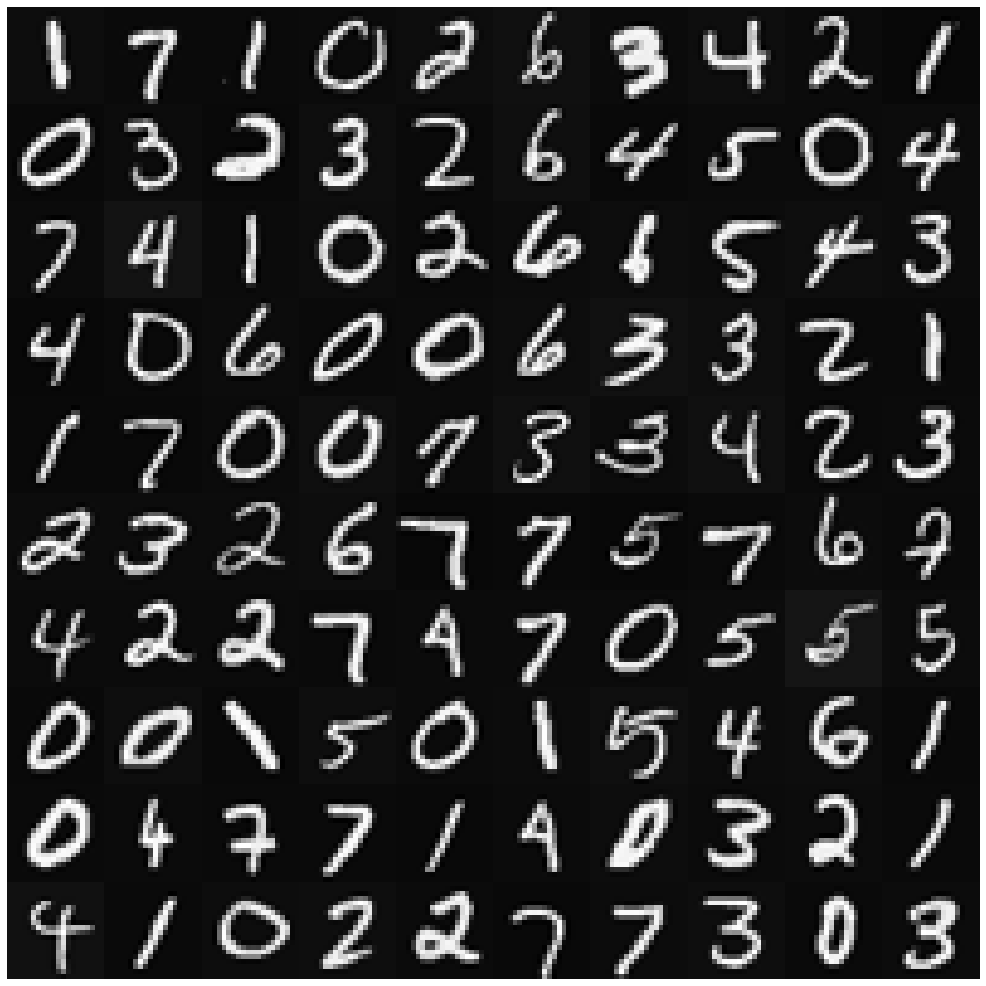

In [4]:
import matplotlib.pyplot as plt

cols = 10
rows = 10

fig, axes = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust( wspace=0.0, hspace=0.0, top=0.845, bottom=0.17, left=0.17, right=0.845)

for i in range(rows):
    for j in range(cols):
            
            axes[i][j].imshow(images_to_display[i*10+j], cmap = 'gray')
            axes[i][j].set_axis_off()
            
plt.show()

Inserting the bias unit to x

In [5]:
x = np.insert(x, 0, 1, axis = 1) #Add a column of ones to the dataset

Creating the Sigmoid Function, the Cost Function and Linear Gradient Discent function for more than one variable

In [6]:


def computes_sigmoid_function (z):
    sigmoid_function = 1 / (1 + np.exp(-z))
    return sigmoid_function
    
def computes_cost_function (x, y, theta, lamb):
    m = len(x)

    predicted_y = computes_sigmoid_function(np.matmul(x, theta))

    regularization_param = (lamb/(2*m)) * (theta.T.dot(theta))
    cost_function = ((1/ m) * ((-y).T.dot(np.log(predicted_y)) - (1 - y).T.dot(np.log(1 - predicted_y)))) + regularization_param
    return cost_function[0][0]

def computes_linear_gradient_discent (x, y, theta, iterations, alpha, lamb):
    m = len(x)
    cost_function = []

    for _ in range(iterations):
        
        predicted_y = computes_sigmoid_function(np.matmul(x, theta))
        
        theta[0][0] = theta[0][0] - alpha * (1 / m) * np.sum(predicted_y - y)
        
        for i in range(1,len(theta)):
            #regularization_param = (lamb/m) * theta[i][0]
            theta[i][0] = theta[i][0]*(1 - alpha*(lamb/m)) - alpha * (1 / m) * x[0:,i:(1+i)].T.dot(predicted_y - y)
        cost_function.append(computes_cost_function(x, y, theta, lamb))

    return theta, cost_function

Calculating Theta for each possible y value

In [7]:
thetas = []
for i in range(1,11):
    y_temp = np.reshape(np.array([1 if number == i else 0 for number in y ]),(5000, 1))


    iterations = 1500
    alpha = 1
    theta = np.zeros((np.shape(x)[1],1))
    lamb = 0.1

    theta, cost_function = computes_linear_gradient_discent(x, y_temp, theta, iterations, alpha, lamb)

    thetas.append(theta)

Applying the Logistic Regression to the examples and printing the results

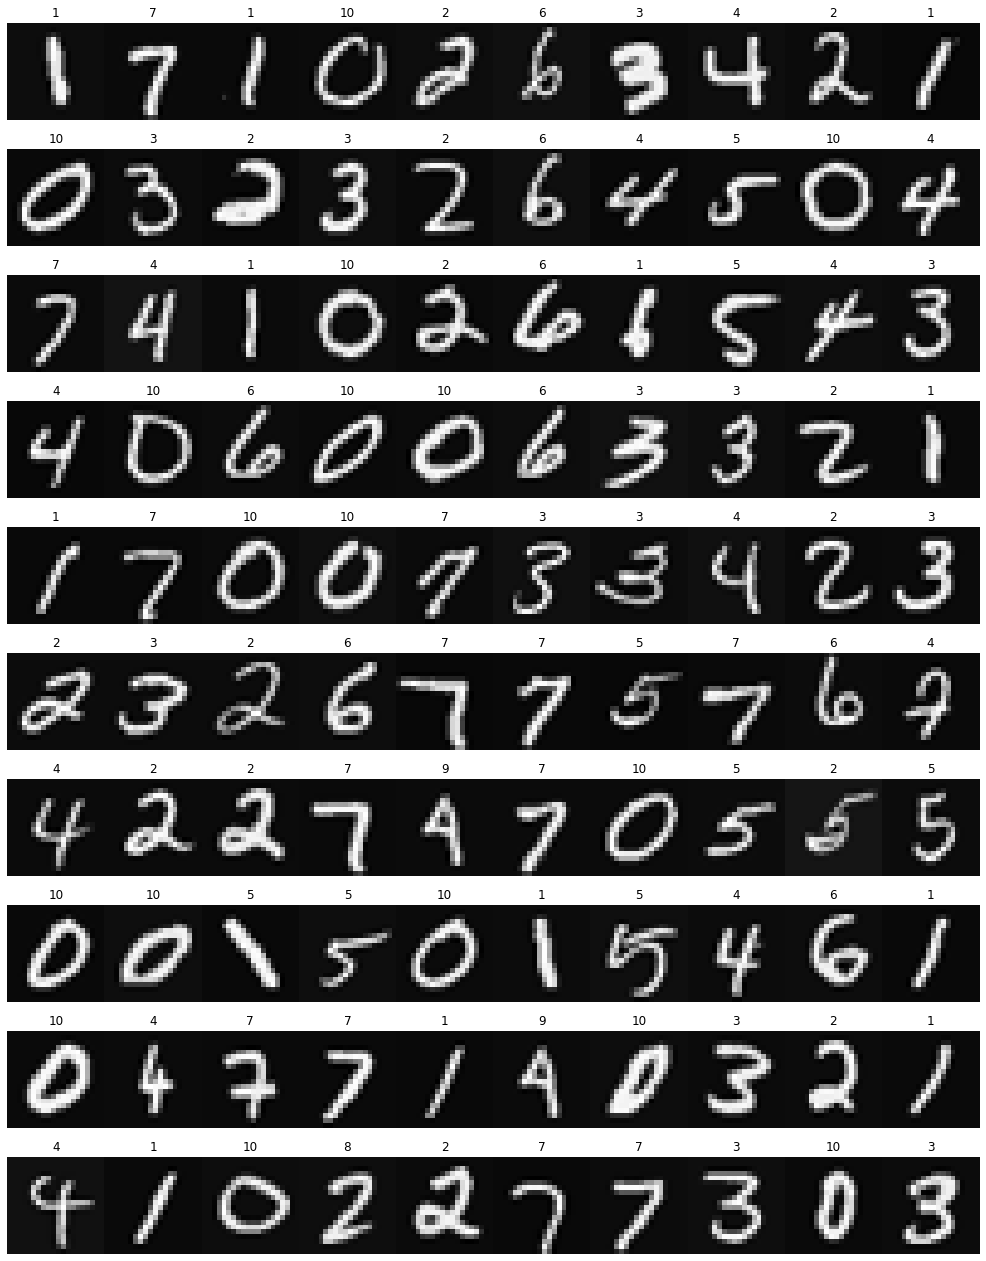

In [12]:
import matplotlib.pyplot as plt

cols = 10
rows = 10

fig, axes = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust( wspace=0.0, hspace=0.0, top=1, left=0.17, right=0.845)

for i in range(rows):
    for j in range(cols):
            
            axes[i][j].imshow(images_to_display[i*10+j], cmap = 'gray')
            axes[i][j].set_axis_off()
            
            max = 0
            number = 0

            for k in range(0,10):
                current = computes_sigmoid_function(np.reshape(x_images_to_display[i*10+j],(401,1)).T.dot(thetas[k])) 
                if current > max:
                    max = current
                    number = k + 1

            axes[i][j].set_title(f'{number}')
            # if(computes_sigmoid_function(np.reshape(x_images_to_display[i*10+j],(401,1)).T.dot(thetas[4])) > 0.5):
            #     axes[i][j].set_title('0')
            # else: 
            #     axes[i][j].set_title('NOT 0')
            
plt.show()

Calculating Accuracy

In [1]:
hits = 0

for j in range(5000):
    max = 0
    number = 0

    for i in range(0,10):
        current = computes_sigmoid_function(x[j].T.dot(thetas[i])) 
        if current >= max:
            max = current
            number = i + 1
    
    if number == y[j]:
        hits += 1

print(f'The accuracy for this training set is {(hits/5000)*100:.2f}%.')

NameError: name 'computes_sigmoid_function' is not defined